# White correction

In [10]:
%reload_ext autoreload
%autoreload 2

from asi import path_config

root = path_config.measurements / "session1"

## Nuance camera

In [11]:
nuance_root = root / 'Nuance'
colorchecker_path = nuance_root / 'colorchecker 2lights'
whiteref_path = nuance_root / 'white 2lights'

In [12]:
from asi.io import load_nuance_image

spectral_image, wavelengths = load_nuance_image(colorchecker_path)
whiteref_image, wavelengths_whiteref = load_nuance_image(whiteref_path)

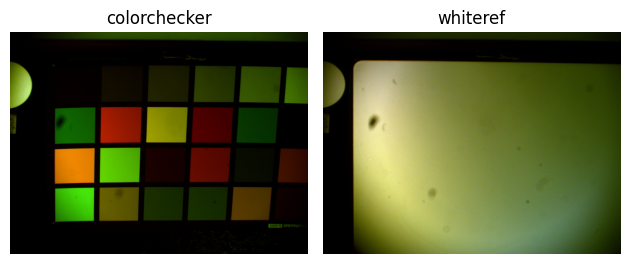

In [13]:
import matplotlib.pyplot as plt

from asi.draw import reconstruct_rgb

# show two images horizontally using axes and add title
fig, ax = plt.subplots(1, 2, tight_layout=True)
ax[0].imshow(reconstruct_rgb(spectral_image, wavelengths))
ax[0].set_title("colorchecker")
ax[1].imshow(reconstruct_rgb(whiteref_image, wavelengths_whiteref))
ax[1].set_title("whiteref")

# don't show the axes
for a in ax:
    a.axis("off")

### White correction with small white reference

Text(0.5, 1.0, 'white corrected')

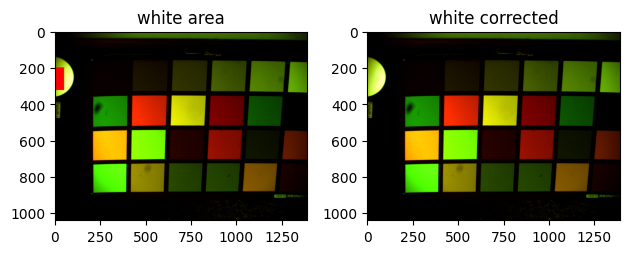

In [27]:
# select area of interest for white correction
from asi.preprocess import white_correction_sq
from segmentation import select_area

white_pos = slice(200, 325), slice(0, 50)

fig, ax = plt.subplots(1, 2, tight_layout=True)

rgb_view = reconstruct_rgb(spectral_image, wavelengths)
rgb_view = select_area(rgb_view, white_pos)
rgb_view *= 1.5
rgb_view = rgb_view.clip(0, 1)
ax[0].imshow(rgb_view)
ax[0].set_title("white area")

# corrected_image = white_correction_sq(spectral_image, white_pos)
corrected_image = spectral_image / spectral_image[white_pos].mean(axis=(0,1))
rgb_view = reconstruct_rgb(corrected_image, wavelengths)
rgb_view *= 1.5
rgb_view = rgb_view.clip(0, 1)
ax[1].imshow(rgb_view)
ax[1].set_title("white corrected")

### White correction with larger white sample

Text(0.5, 1.0, 'white corrected')

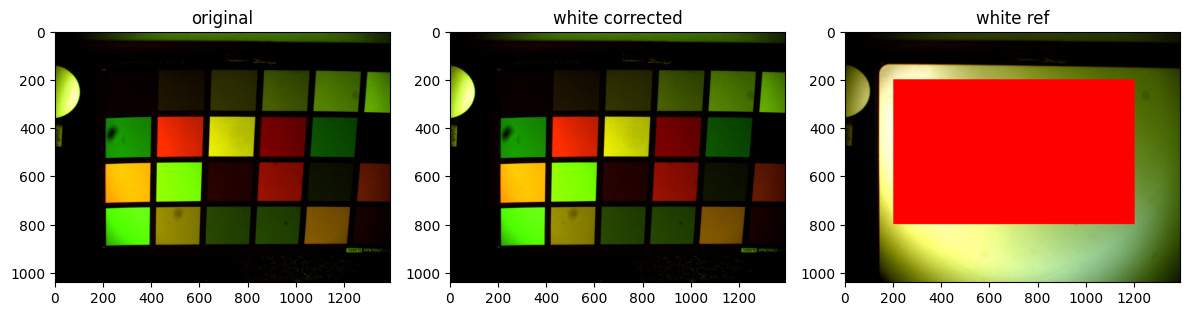

In [26]:
fig, ax = plt.subplots(1, 3, tight_layout=True, figsize=(12, 4))

rgb_view1 = reconstruct_rgb(spectral_image, wavelengths)
rgb_view1 *= 1.5
rgb_view1 = rgb_view1.clip(0, 1)
ax[0].imshow(rgb_view1)
ax[0].set_title("original")

white_pos = slice(200, 650), slice(400, 750)
white_pos = slice(200, 800), slice(200, 1200)
# white_pos = slice()
whiteref = whiteref_image[white_pos].mean(axis=(0, 1))
rgb_view2 = reconstruct_rgb(whiteref_image, wavelengths_whiteref)
rgb_view2 = select_area(rgb_view2, white_pos)

rgb_view2 *= 1.5
rgb_view2 = rgb_view2.clip(0, 1)

ax[2].imshow(rgb_view2)
ax[2].set_title("white ref")

white_corrected = spectral_image / whiteref
rgb_view3 = reconstruct_rgb(white_corrected, wavelengths)
rgb_view3 *= 1.5
rgb_view3 = rgb_view3.clip(0, 1)
ax[1].imshow(rgb_view3)
ax[1].set_title("white corrected")

# for a in ax:
#     a.axis("off")

(51,)

## Specium Scanner

## SpecimIQ

In [4]:
import matplotlib.pyplot as plt

from asi import path_config

specim_iq_root = path_config.measurements / "session1" / "SpecimIQ"

path_404 = specim_iq_root / "404" / "capture"
path_405 = specim_iq_root / "405" / "capture"

Text(0.5, 1.0, 'White corrected by default references')

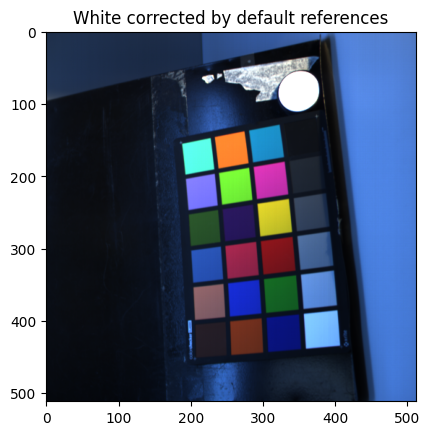

In [5]:
from asi.draw import reconstruct_rgb_envi
from asi.preprocess import load_white_corrected

image_path = path_404 / "404"
darkref_path = path_404 / "DARKREF_404"
whiteref_path = path_404 / "WHITEREF_404"

spectral_image, envi_header = load_white_corrected(
    image_path, whiteref_path, darkref_path
)
rgb_view = reconstruct_rgb_envi(spectral_image, envi_header)
rgb_view *= 2.5
rgb_view = rgb_view.clip(0, 1)
plt.imshow(rgb_view)
plt.title("White corrected by default references")

Text(0.5, 1.0, 'white corrected')

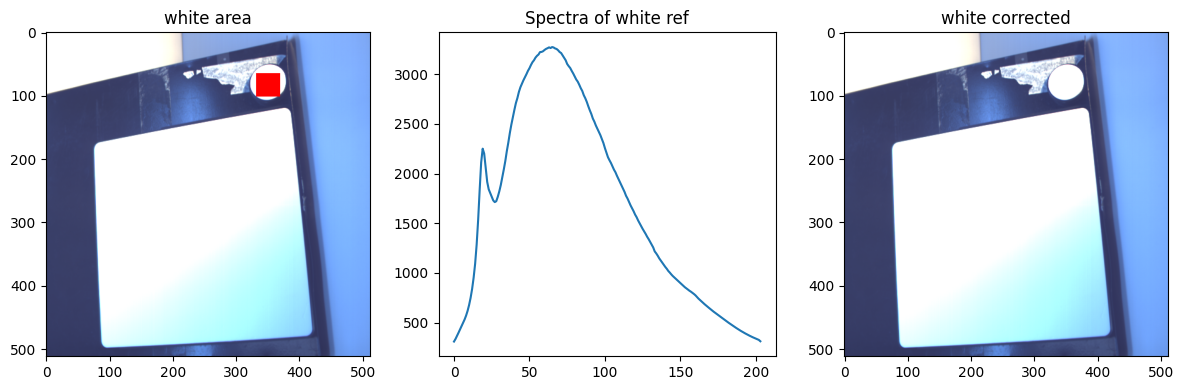

In [ ]:
from asi.draw import select_area
from asi.io.load_envi import load_spectral_image

image_path = path_404 / "405"
spectral_image, envi_header = load_spectral_image(image_path)

fig, ax = plt.subplots(1, 3, tight_layout=True, figsize=(12, 4))


white_pos = slice(65, 102), slice(332, 370)

rgb_view = reconstruct_rgb_envi(spectral_image, envi_header)
rgb_view *= 2.5
rgb_view = rgb_view.clip(0, 1)
rgb_view = select_area(rgb_view, white_pos)
ax[0].imshow(rgb_view)
ax[0].set_title("white area")

ax[1].plot(spectral_image[white_pos].mean(axis=(0, 1)))
ax[1].set_title("Spectra of white ref")

white_sq = spectral_image[white_pos]
# replace nonzero elements with minimum value
nonzero_elements = white_sq[white_sq != 0]
min_elm = nonzero_elements.min()
white_sq = white_sq.clip(min_elm, None)

# apply white correction
whiteref = white_sq.mean((0, 1))
white_corrected = spectral_image / whiteref
white_corrected /= white_corrected.max()
white_corrected = white_corrected.clip(0, 1)

rgb_view = reconstruct_rgb_envi(white_corrected, envi_header)
rgb_view *= 2.5
rgb_view = rgb_view.clip(0, 1)
ax[2].imshow(rgb_view)
ax[2].set_title("white corrected")

Text(0.5, 1.0, 'white corrected')

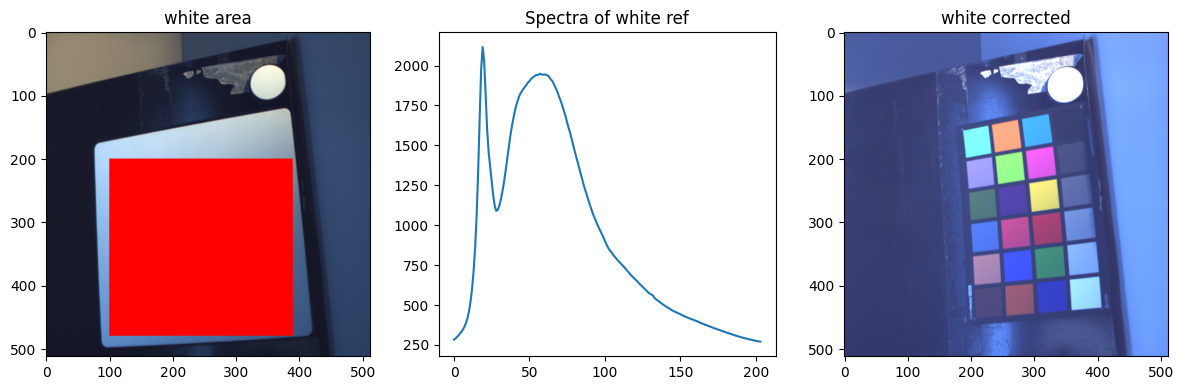

In [ ]:
image_path = path_404 / "404"
spectral_image, envi_header = load_spectral_image(image_path)
image_path = path_405 / "405"
white_img, white_envi_header = load_spectral_image(image_path)


fig, ax = plt.subplots(1, 3, tight_layout=True, figsize=(12, 4))
white_pos = slice(200, 485), slice(100, 390)
rgb_view = reconstruct_rgb_envi(white_img, white_envi_header)
rgb_view = select_area(rgb_view, white_pos)
ax[0].imshow(rgb_view)
ax[0].set_title("white area")

whiteref = white_img[white_pos].mean(axis=(0, 1))
ax[1].plot(whiteref)
ax[1].set_title("Spectra of white ref")

white_corrected = spectral_image / whiteref
rgb_view = reconstruct_rgb_envi(white_corrected, envi_header)
rgb_view *= 2.5
rgb_view = rgb_view.clip(0, 1)
ax[2].imshow(rgb_view)
ax[2].set_title("white corrected")

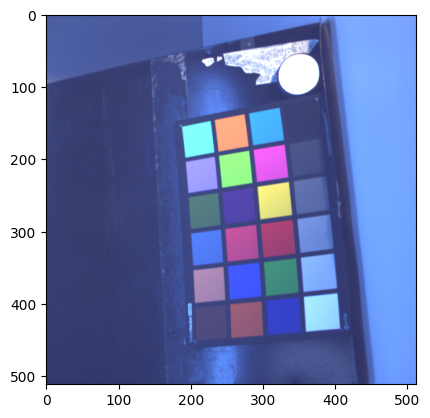

In [108]:
white_corrected = spectral_image / white_img[white_pos].mean(axis=(0, 1))
rgb_view = reconstruct_rgb_envi(white_corrected, envi_header)
rgb_view *= 2.5
rgb_view = rgb_view.clip(0, 1)
plt.imshow(rgb_view)

In [92]:
white_corrected

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

## Tunable Lights